In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_parquet('./data/nyc-taxis-tips/train.parquet', engine='pyarrow')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492


In [4]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
congestion_surcharge            float64
Airport_fee                     float64
PU_location_lat                 float64
PU_location_lon                 float64
DO_location_lat                 float64
DO_location_lon                 float64
dtype: object

In [5]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.759540,2024-01-17 01:37:59.341700,2024-01-17 01:53:39.024740,1.335090,3.213008,1.998210,1.186610,18.044264,1.538507,0.497315,3.430985,0.525877,0.999882,2.335125,0.140857,40.752187,-73.965628,40.754760,-73.971940
min,1.000000,2023-12-31 23:56:46,2024-01-01 00:03:50,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.576961,-74.174002,40.528686,-74.187679
25%,2.000000,2024-01-09 15:34:38,2024-01-09 15:50:20.750000,1.000000,1.000000,1.000000,1.000000,8.600000,0.000000,0.500000,1.000000,0.000000,1.000000,2.500000,0.000000,40.740439,-73.989845,40.740337,-73.989845
50%,2.000000,2024-01-17 11:32:54.500000,2024-01-17 11:51:50,1.000000,1.690000,1.000000,1.000000,12.800000,1.000000,0.500000,2.800000,0.000000,1.000000,2.500000,0.000000,40.758028,-73.977698,40.758028,-73.977698
75%,2.000000,2024-01-24 18:09:36,2024-01-24 18:28:48.500000,1.000000,3.100000,1.000000,1.000000,19.800000,2.500000,0.500000,4.200000,0.000000,1.000000,2.500000,0.000000,40.773633,-73.965146,40.773633,-73.961764
max,2.000000,2024-01-31 23:59:07,2024-02-01 10:57:24,7.000000,53.640000,99.000000,4.000000,214.800000,11.750000,0.500000,99.000000,49.260000,1.000000,2.500000,1.750000,40.899528,-73.726655,40.899528,-73.711025
std,0.427365,NaN,NaN,0.847745,4.219928,9.594546,0.458398,15.839824,1.788004,0.036542,3.686474,2.020583,0.009412,0.620490,0.476090,0.032148,0.048564,0.031182,0.036295


In [6]:
df["tip_amount"].describe()

count    100000.000000
mean          3.430985
std           3.686474
min           0.000000
25%           1.000000
50%           2.800000
75%           4.200000
max          99.000000
Name: tip_amount, dtype: float64

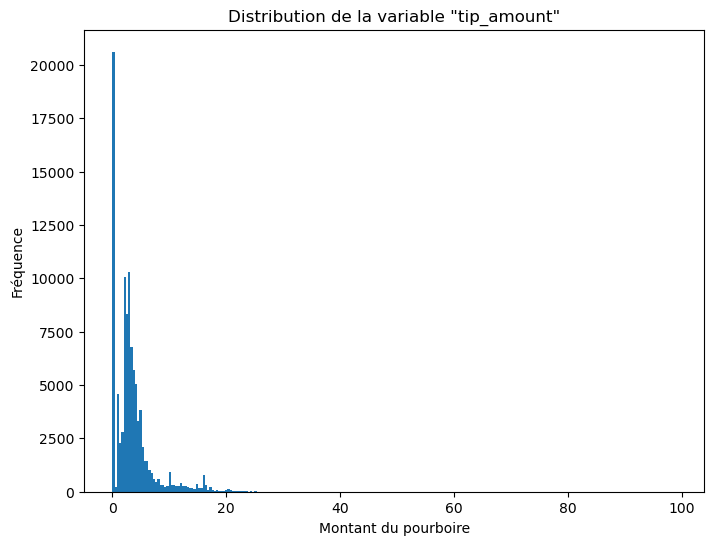

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['tip_amount'], bins = 250)
plt.title('Distribution de la variable "tip_amount"')
plt.xlabel('Montant du pourboire')
plt.ylabel('Fréquence')
plt.show()

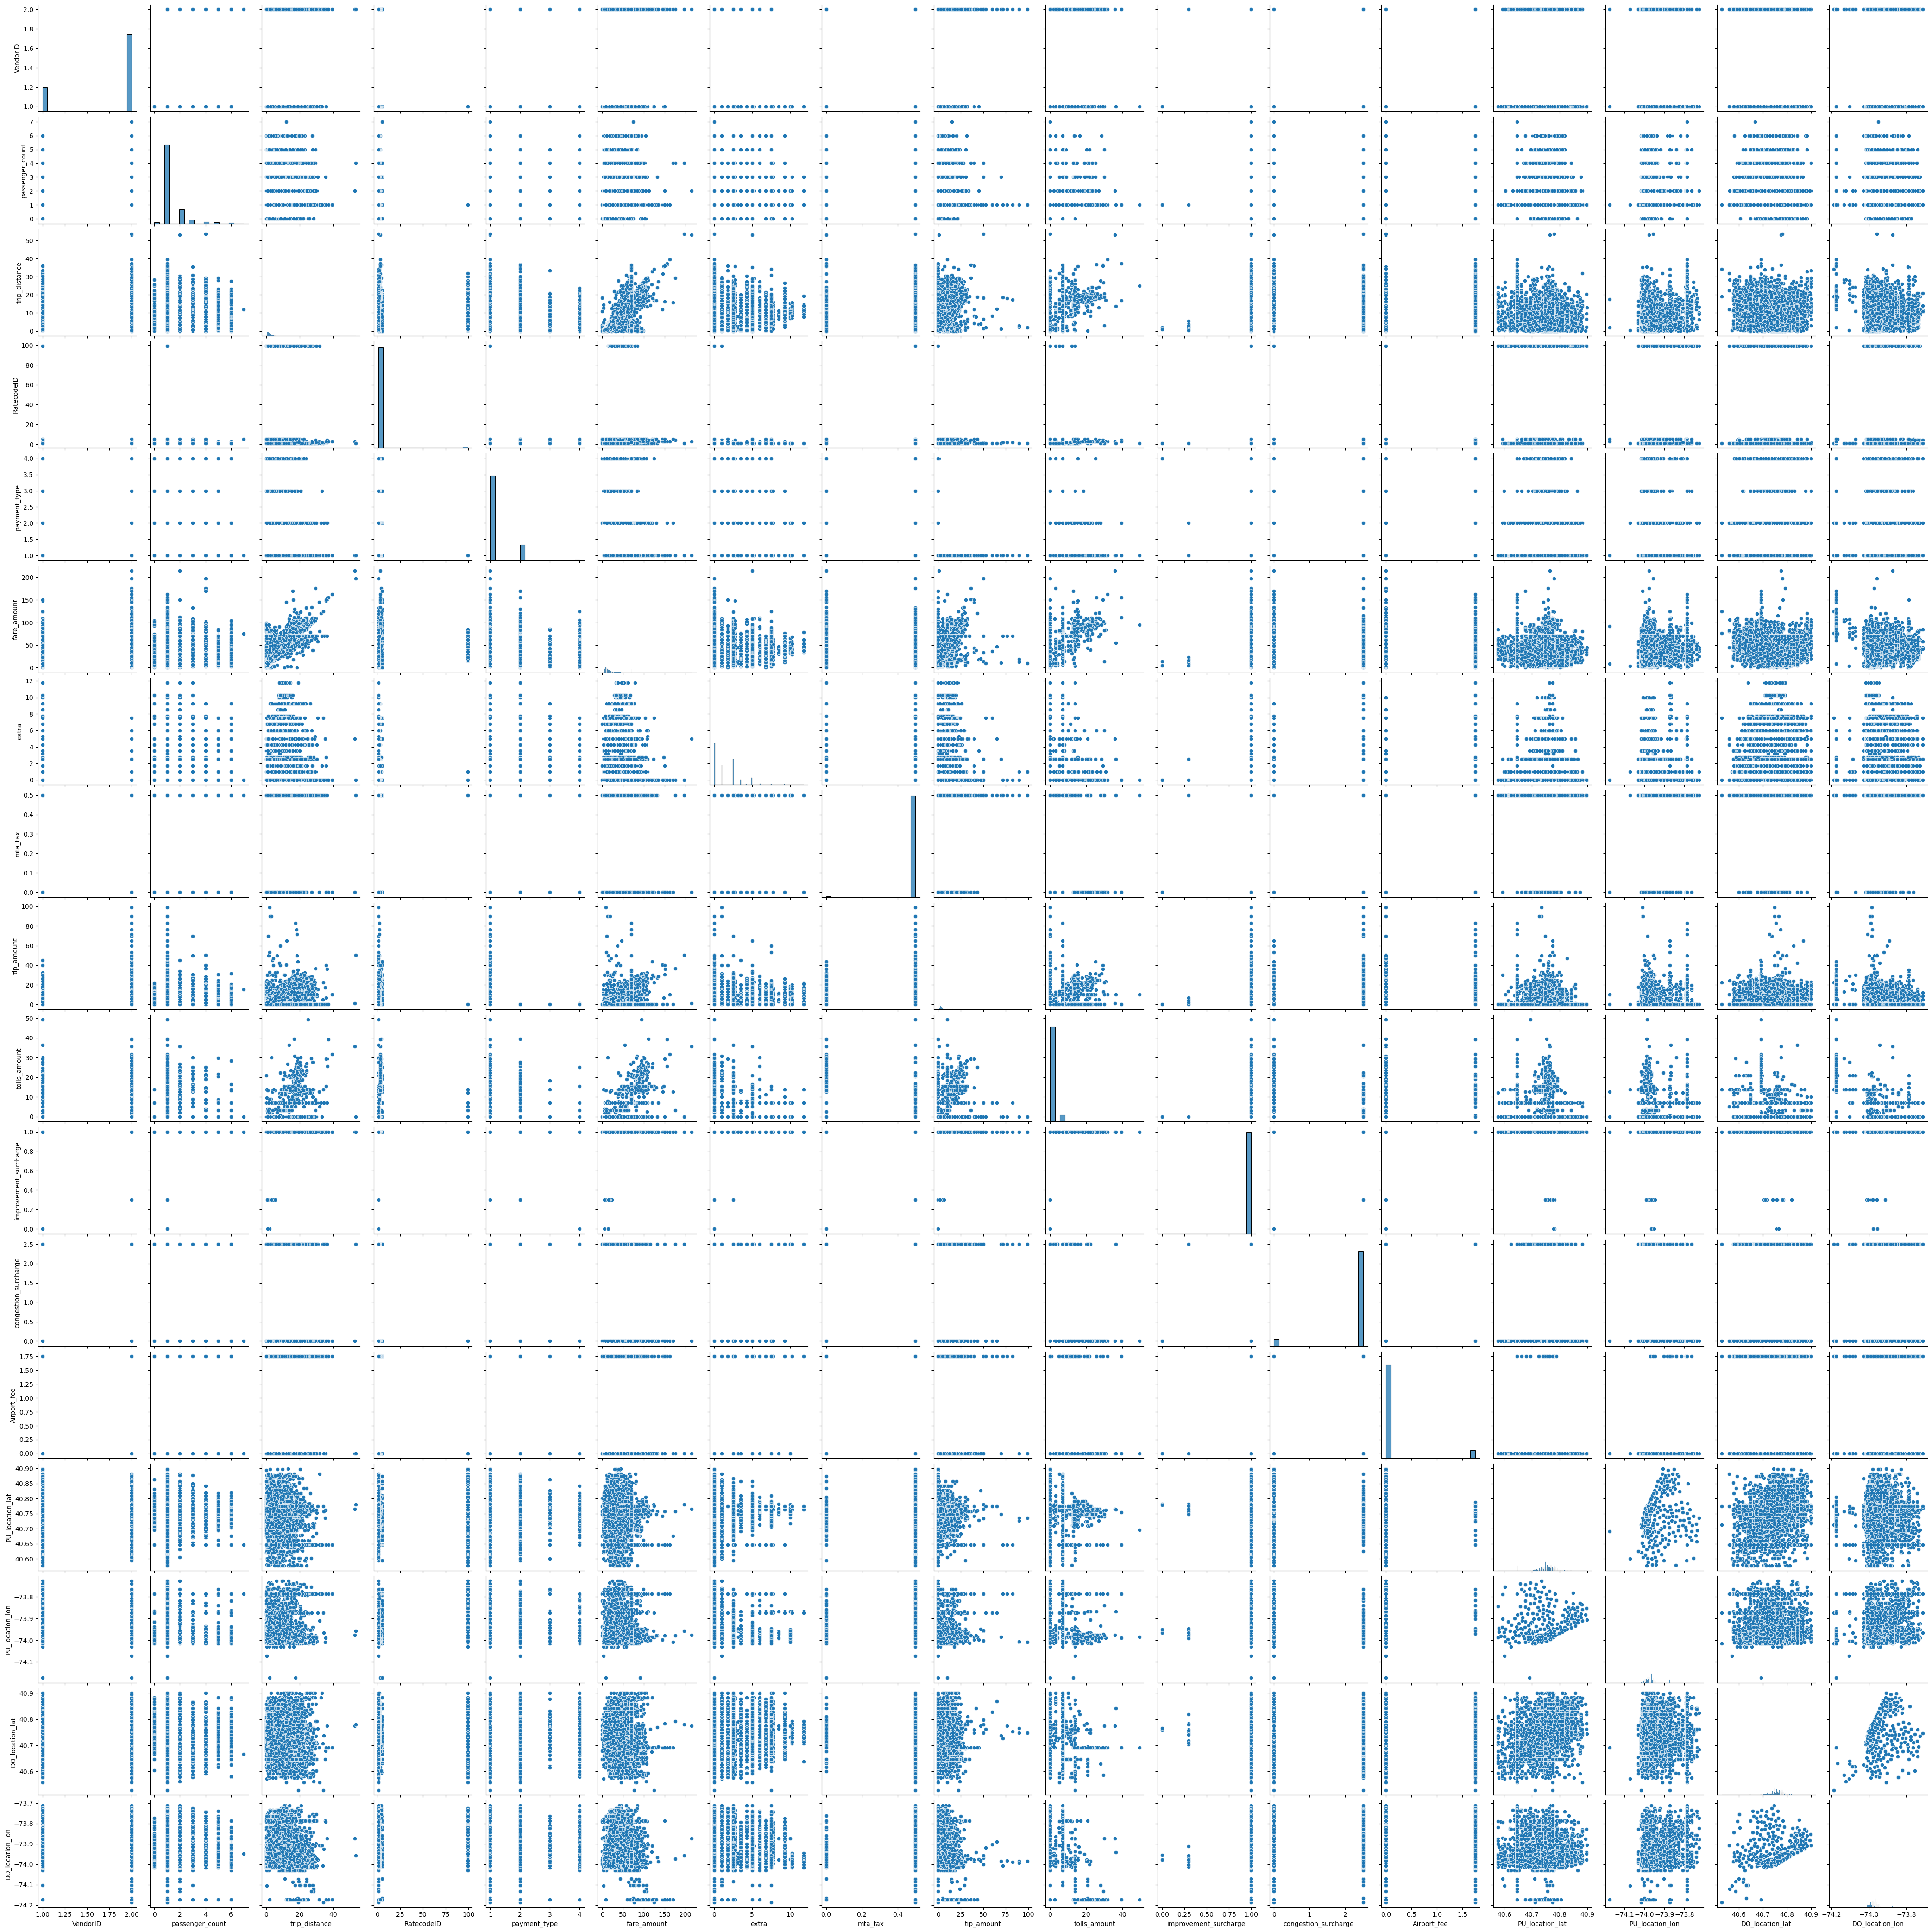

In [10]:
sns.pairplot(df)
plt.show()

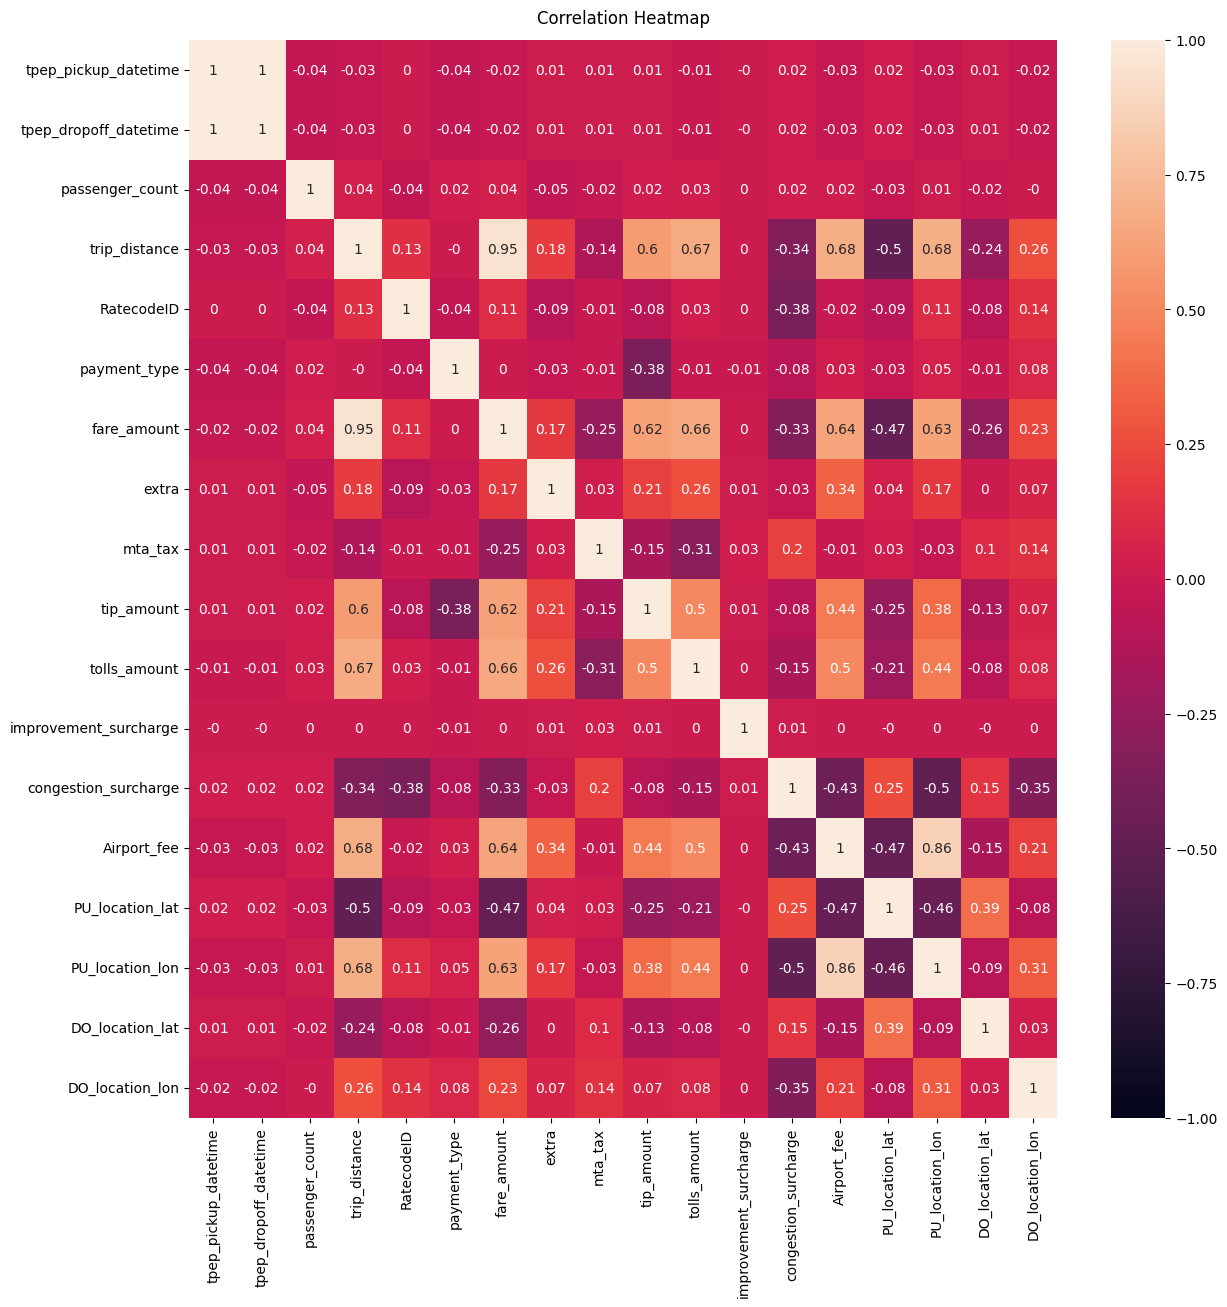

In [16]:
plt.figure(figsize=(14, 14))
df_cor = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon']]
# Calcul de la matrice de corrélation
correlation_matrix = df_cor.corr().round(2)

heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

pas de valeur nulle   

variable categorielle : 
VendorID, RateCodeID, Store_and_fwd_flag, Payment_type   

convertire l'heure de debut et de fin en durée   
latitude/longitude faire quelquechose ?

In [15]:
#création variable durée d'un trajet
df["duree"] = df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]

# Appliquez la fonction à la colonne "duree" (en heure)
df["duree"] = df["duree"].dt.total_seconds() / 60

# on supprime les variables pep_dropoff_datetime et tpep_pickup_datetime
df.drop(columns=["tpep_pickup_datetime", "tpep_dropoff_datetime"], inplace=True)

In [16]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'PU_location_lat',
       'PU_location_lon', 'DO_location_lat', 'DO_location_lon', 'duree'],
      dtype='object')

In [17]:
# One-hot encoding sur les colonnes spécifiées
df_encoded = pd.get_dummies(df, columns=["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type"], dtype=int)

df_encoded

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,...,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,1.0,3.30,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
1,1.0,0.72,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
2,2.0,7.45,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
3,1.0,1.53,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
4,1.0,1.53,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,4.38,26.1,0.0,0.5,3.00,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
99996,1.0,5.34,25.4,1.0,0.5,6.08,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,1,0,0,0
99997,1.0,10.10,35.5,0.0,0.5,0.00,0.0,1.0,0.0,0.0,...,0,0,0,1,1,0,1,0,0,0
99998,1.0,5.82,36.6,0.0,0.5,0.00,0.0,1.0,2.5,0.0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
# separation des données 
X = df.drop("tip_amount", axis=1)
Y = df["tip_amount"]

X_enc = df_encoded.drop("tip_amount", axis=1)
Y_enc = df_encoded["tip_amount"]

In [19]:
# divise les données 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, Y_enc, test_size=0.25, random_state=42)

In [20]:
# normaliser les données 

# Séparation des colonnes encodées (one-hot encoded) et des colonnes numériques à normaliser
columns_to_keep = ["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type"]
columns_to_norm = [col for col in X.columns if col not in columns_to_keep]

# Normaliser les colonnes numériques de l'ensemble d'entraînement
scaler = StandardScaler()
X_train_normed = X_train.copy()
X_test_normed = X_test.copy()

# Normalisation sur l'ensemble d'entraînement
X_train_normed[columns_to_norm] = scaler.fit_transform(X_train[columns_to_norm])

# Appliquer la même transformation sur l'ensemble de test
X_test_normed[columns_to_norm] = scaler.transform(X_test[columns_to_norm])



# Données encodées : 
scaler = StandardScaler()
X_train_enc_normed = X_train_enc.copy()
X_test_enc_normed = X_test_enc.copy()

X_train_enc_normed[columns_to_norm] = scaler.fit_transform(X_train_enc[columns_to_norm])

X_test_enc_normed[columns_to_norm] = scaler.transform(X_test_enc[columns_to_norm])

# outliers dans la varibale durée ?

In [21]:
# Modèle Lasso : 
model_lasso = Lasso()
model_lasso.fit(X_train_enc_normed, y_train_enc)
y_pred = model_lasso.predict(X_test_enc_normed)

mse = mean_squared_error(y_test_enc, y_pred)
r2 = r2_score(y_test_enc, y_pred)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient de détermination (R2 Score):", r2)


Mean Squared Error (MSE): 9.31365902478323
Coefficient de détermination (R2 Score): 0.31694023151500184


In [22]:
model_lasso_CV = LassoCV(alphas=[1, 0.5, 0.1, 0.01, 0.001, 0.0001], cv=5)
model_lasso_CV.fit(X_train_enc_normed, y_train_enc)

y_pred = model_lasso_CV.predict(X_test_enc_normed)

mse = mean_squared_error(y_test_enc, y_pred)
r2 = r2_score(y_test_enc, y_pred)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient de détermination (R2 Score):", r2)
print("meilleur alpha : ", model_lasso_CV.alpha_)

Mean Squared Error (MSE): 5.332074409717998
Coefficient de détermination (R2 Score): 0.6089479438580233
meilleur alpha :  0.001


In [23]:
# Modèle Ridge : 
model_ridge_CV = RidgeCV(alphas=[1, 0.5, 0.1, 0.01, 0.001, 0.0001])
model_ridge_CV.fit(X_train_enc_normed, y_train_enc)
y_pred = model_ridge_CV.predict(X_test_enc_normed)

mse = mean_squared_error(y_test_enc, y_pred)
r2 = r2_score(y_test_enc, y_pred)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient de détermination (R2 Score):", r2)
print("meilleur alpha : ", model_ridge_CV.alpha_)

Mean Squared Error (MSE): 5.331052796593398
Coefficient de détermination (R2 Score): 0.6090228685275343
meilleur alpha :  1.0


In [ ]:
# Modèle Ridge : 
model_ridge_CV = RidgeCV(alphas=[1, 0.5, 0.1, 0.01, 0.001, 0.0001])
model_ridge_CV.fit(X_train_enc_normed, y_train_enc)
y_pred = model_ridge_CV.predict(X_test_enc_normed)

mse = mean_squared_error(y_test_enc, y_pred)
r2 = r2_score(y_test_enc, y_pred)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Coefficient de détermination (R2 Score):", r2)
print("meilleur alpha : ", model_ridge_CV.alpha_)